# Bellabeat: Fitbit Dataset Analysis

Author: Harry Stuart Curtis

Date: 2023-06-05

## Introduction and Scenario

In this analysis, I examine the data from a Kaggle dataset to find insights that would be of use to Bellabeat, a fictional company that provides health-oriented smart devices to women. The data from the analysis refers to the period from 12 April until 12 May 2016, and contains data collected from 33 Fitbit users. Fitbit is an American company that manufactures wearable technology for activity tracking. As of 2016, they had the largest share of the global wearables market. Bellabeat also produces a number of smart devices, and hopes to learn how consumers use their wearables from this dataset.

## Business Questions

- What are some trends in smart device usage?
- How could these trends apply to Bellabeat customers?
- How could these trends help influence Bellabeat marketing strategy?

## Data Preparation

#### Importing Libraries

As we are using Python for the analysis, the first step is to import the necessary libraries.

In [1]:
# Import libraries.
import os
import names
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

#### Reading the Data

Then, we need to take the data in the CSV files and transform them into a format that is useable within Python. In this case, we will transform the files into DataFrame objects (from the Pandas module) and store them in a dictionary.

In [2]:
# Retrieve the list of files in the Fitbit dataset.
filenames = os.listdir("Fitabase Data 4.12.16-5.12.16")

# Transform the CSV files into DataFrame objects.
datasets = [pd.read_csv(f"Fitabase Data 4.12.16-5.12.16/{file}") for file in filenames]

# Add them to a dictionary.
data_raw = dict(zip(filenames, datasets))

#### What shape is the data?

Now that we have made the data accessible to Python, we should begin to prepare the data. Here, we will get an idea of some of its characteristics, starting with the data shape.

Below we can see that the majority of the files contain data in a long and narrow format (there are many rows and few columns), such as the "hourlyCalrories_merged" and the "dailySteps_merged" tables. While all of the tables contain long data, a couple, such as the ones with "Wide" in the filename, contain data in a wide format (with many columns).

All of the wide data is actually duplicate data of another set. The files that have "Narrow" in the filename are simply a reformatted version of the "Wide" data.

In [3]:
# Check the number of rows and columns in each table.
print("== Table: Shape ==")
for table in data_raw.keys():
    print(f"  {table}: {data_raw[table].shape}")

== Table: Shape ==
  dailyActivity_merged.csv: (940, 15)
  dailyCalories_merged.csv: (940, 3)
  dailyIntensities_merged.csv: (940, 10)
  dailySteps_merged.csv: (940, 3)
  heartrate_seconds_merged.csv: (2483658, 3)
  hourlyCalories_merged.csv: (22099, 3)
  hourlyIntensities_merged.csv: (22099, 4)
  hourlySteps_merged.csv: (22099, 3)
  minuteCaloriesNarrow_merged.csv: (1325580, 3)
  minuteCaloriesWide_merged.csv: (21645, 62)
  minuteIntensitiesNarrow_merged.csv: (1325580, 3)
  minuteIntensitiesWide_merged.csv: (21645, 62)
  minuteMETsNarrow_merged.csv: (1325580, 3)
  minuteSleep_merged.csv: (188521, 4)
  minuteStepsNarrow_merged.csv: (1325580, 3)
  minuteStepsWide_merged.csv: (21645, 62)
  sleepDay_merged.csv: (413, 5)
  weightLogInfo_merged.csv: (67, 8)


#### What do the tables look like?

Next, we take a glimpse at the tables to get an impression of their columns and their first few rows. It isn't necessary for us to look at every table, since many tables have a similar or identical format.

The first is the "dailyActivity_merged" table. The three other files that have "daily" in their name are subsets of "dailyActivity". They contain duplicate data in a separate table. 

In [4]:
# View the first 5 rows of the dailyActivity table.
data_raw["dailyActivity_merged.csv"].head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
# Preview the first five rows of the heartrate_seconds table.
data_raw["heartrate_seconds_merged.csv"].head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [6]:
# Preview the first five rows of the hourlyCalories table.
data_raw["hourlyCalories_merged.csv"].head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [7]:
# Preview the first five rows of the minuteCaloriesNarrow table.
data_raw["minuteCaloriesNarrow_merged.csv"].head()

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865
3,1503960366,4/12/2016 12:03:00 AM,0.7865
4,1503960366,4/12/2016 12:04:00 AM,0.7865


#### Checking for Missing Data

Then, we check to see if there were any null values, or empty cells, in the tables. It turns out that the only table with null values was "weightLogInfo_merged". This was because two of the fields in the table ("Fat" and "BMI") were only available if the user had a device capable of measuring them, which not all users did.

In [8]:
# Check for missing values.
print("== Table: Contains Null ==")
for table in data_raw.keys():
    print(f"  {table}: {data_raw[table].isnull().values.any()}")

== Table: Contains Null ==
  dailyActivity_merged.csv: False
  dailyCalories_merged.csv: False
  dailyIntensities_merged.csv: False
  dailySteps_merged.csv: False


  heartrate_seconds_merged.csv: False
  hourlyCalories_merged.csv: False
  hourlyIntensities_merged.csv: False
  hourlySteps_merged.csv: False
  minuteCaloriesNarrow_merged.csv: False
  minuteCaloriesWide_merged.csv: False
  minuteIntensitiesNarrow_merged.csv: False
  minuteIntensitiesWide_merged.csv: False
  minuteMETsNarrow_merged.csv: False
  minuteSleep_merged.csv: False
  minuteStepsNarrow_merged.csv: False
  minuteStepsWide_merged.csv: False
  sleepDay_merged.csv: False
  weightLogInfo_merged.csv: True


#### What are the data types of each column?

Next, we check the data types for each field. Most of the columns have fairly predictable data types, but the columns with dates and times contain strings. In some cases, we may have to transform them into datetime objects so that they can be parsed as dates and times correctly.

In [9]:
# Check the data types of each column.
print("=== Data Types ===")
for table in data_raw.keys():
    print(f"== Table: {table} ==")
    for column in data_raw[table].columns:
        print(f"    {column}: {data_raw[table][column].dtype}")

=== Data Types ===
== Table: dailyActivity_merged.csv ==
    Id: int64
    ActivityDate: object
    TotalSteps: int64
    TotalDistance: float64
    TrackerDistance: float64
    LoggedActivitiesDistance: float64
    VeryActiveDistance: float64
    ModeratelyActiveDistance: float64
    LightActiveDistance: float64
    SedentaryActiveDistance: float64
    VeryActiveMinutes: int64
    FairlyActiveMinutes: int64
    LightlyActiveMinutes: int64
    SedentaryMinutes: int64
    Calories: int64
== Table: dailyCalories_merged.csv ==
    Id: int64
    ActivityDay: object
    Calories: int64
== Table: dailyIntensities_merged.csv ==
    Id: int64
    ActivityDay: object
    SedentaryMinutes: int64
    LightlyActiveMinutes: int64
    FairlyActiveMinutes: int64
    VeryActiveMinutes: int64
    SedentaryActiveDistance: float64
    LightActiveDistance: float64
    ModeratelyActiveDistance: float64
    VeryActiveDistance: float64
== Table: dailySteps_merged.csv ==
    Id: int64
    ActivityDay: object


#### What was the sample size for each table?

Overall, there were 33 unique users. However, some of the tables only contained subsets of the 33 users, such as the "heartrate_seconds", "minuteSleep", "sleepDay" and "weightLogInfo" tables. This is because not all of the people in the sample opted to use all of the capabilities of their Fitbit device, or did not use a another device besides their Fitbit device. For example, 24 of the 33 users tracked their sleep, but only 8 of the 33 users logged their weight to the app.

Unfortunately, the small sample size will not allow us to infer much about the Fitbit population. There may well be some sampling bias, and we have no additional information about the methods used to select the 33 users. Thus, it is important to note that the trends and patterns from this analysis are like a roadmap to more significant insights, rather than actionable insights in themselves. Given the large number of Fitbit users around the world, a sample size of at least several hundred randomly-selected users would be necessary for us to make credible inferences about the population. Nevertheless, this analysis may help Bellabeat to identify areas for research and development in the future.

In [10]:
# Check the sample size (the number of unique users) for each table.
print("= Number of Unique Users =")
for table in data_raw.keys():
    print(f"{table}: {data_raw[table]['Id'].nunique()}")

= Number of Unique Users =
dailyActivity_merged.csv: 33
dailyCalories_merged.csv: 33
dailyIntensities_merged.csv: 33
dailySteps_merged.csv: 33
heartrate_seconds_merged.csv: 14
hourlyCalories_merged.csv: 33
hourlyIntensities_merged.csv: 33
hourlySteps_merged.csv: 33
minuteCaloriesNarrow_merged.csv: 33
minuteCaloriesWide_merged.csv: 33
minuteIntensitiesNarrow_merged.csv: 33
minuteIntensitiesWide_merged.csv: 33
minuteMETsNarrow_merged.csv: 33
minuteSleep_merged.csv: 24
minuteStepsNarrow_merged.csv: 33
minuteStepsWide_merged.csv: 33
sleepDay_merged.csv: 24
weightLogInfo_merged.csv: 8


## Data Cleaning

#### Convert IDs into Pseudonyms

First, in order to make the unique user IDs easier to distinguish, we assign them to a random unique pseudonym. The pseudonyms are first names taken from the 1990 US Census, using the Python 'names' module. They are randomly generated each time the notebook is run, and so are unlikely to be consistent across sessions.

Since there is no gender information from the dataset, there is no connection between the name gender and the user gender. All the pseudonyms are purely for recognition purposes. Thus, any resemblance to the true name of the user is purely coincidental.

In [11]:
# Generate a unique pseudonym for each user and pair with a user ID.
user_ids = list(set(data_raw["dailyActivity_merged.csv"]["Id"]))
pseudonyms = []
while len(set(pseudonyms)) < data_raw["dailyActivity_merged.csv"]["Id"].nunique():
    pseudonyms.append(names.get_first_name())
pseudonyms = list(set(pseudonyms))
id_dict = dict(zip(user_ids, pseudonyms))
print(id_dict)

{8053475328: 'Whitney', 1644430081: 'Peter', 8378563200: 'Virginia', 4558609924: 'Susan', 8583815059: 'Robert', 4319703577: 'Paul', 2320127002: 'Isaac', 2026352035: 'John', 7007744171: 'George', 1503960366: 'Rita', 8877689391: 'Lena', 2347167796: 'Mildred', 4388161847: 'Phyllis', 1927972279: 'Josue', 2022484408: 'Dee', 6775888955: 'Benny', 8792009665: 'Pedro', 5553957443: 'Colin', 3372868164: 'James', 7086361926: 'Leonard', 6962181067: 'Gail', 4057192912: 'Mary', 3977333714: 'Rodolfo', 4702921684: 'Dolores', 2873212765: 'Earl', 6290855005: 'Leon', 5577150313: 'Randal', 4020332650: 'Kimberly', 4445114986: 'Julissa', 1844505072: 'Carolyn', 1624580081: 'Oscar', 6117666160: 'Catrina', 8253242879: 'Rachel'}


#### Sorting into DataFrames

Next, we sort the user's data into grouped Pandas dataframes for easier manipulation.

##### Daily Data

The highest level of data collected are the tables that contain "daily". All of the tables that contain the word "daily" are subsets of the "dailyActivity" table. They contain duplicate data records. Therefore, we only need the "dailyActivity" table for the data summarized on a day-by-day basis.

In [12]:
# Create a dataframe containing the daily data.
df_daily = data_raw["dailyActivity_merged.csv"]

# In the 'df_daily' dataframe, convert the date strings in 'ActivityDay' to datetime objects.
df_daily["ActivityDate"] = pd.to_datetime(df_daily["ActivityDate"], format="%m/%d/%Y")

# Replace the IDs with pseudonyms.
df_daily["Id"] = df_daily["Id"].apply(lambda x: id_dict[x])

# Create a column that shows the proportion of total tracked activity time that a user spent sedentary.
df_daily["SedentaryProportion"] = df_daily["SedentaryMinutes"] / (df_daily["VeryActiveMinutes"] + df_daily["FairlyActiveMinutes"] + df_daily["LightlyActiveMinutes"] + df_daily["SedentaryMinutes"])

df_daily.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SedentaryProportion
0,Rita,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.665448
1,Rita,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.751210
2,Rita,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.845833
3,Rita,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0.727455
4,Rita,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,0.743269


##### Minute-Level Data

Next, we merge the dataframes that contain data collected on a minute-by-minute basis and assign it to the variable "df_minute". Unlike the daily reports, there is no single table containing all the minute data.

In [13]:
# Create a merged dataframe containing all of the minute data.
df_minute = pd.merge(data_raw["minuteCaloriesNarrow_merged.csv"], data_raw["minuteStepsNarrow_merged.csv"], on=["Id", "ActivityMinute"], how="inner")
df_minute = pd.merge(df_minute, data_raw["minuteIntensitiesNarrow_merged.csv"], on=["Id", "ActivityMinute"], how="inner")
df_minute = pd.merge(df_minute, data_raw["minuteMETsNarrow_merged.csv"], on=["Id", "ActivityMinute"], how="inner")

# In the 'df_minute' dataframe, convert the timestamp strings in 'ActivityMinute' to datetime objects.
df_minute["ActivityMinute"] = pd.to_datetime(df_minute["ActivityMinute"], format="%m/%d/%Y %I:%M:%S %p")

# Replace the IDs with pseudonyms.
df_minute["Id"] = df_minute["Id"].apply(lambda x: id_dict[x])

# Correct the metabolic equivalent of task (MET) values by dividing them by ten.
df_minute["METs"] = df_minute["METs"] / 10

df_minute.head()

,Id,ActivityMinute,Calories,Steps,Intensity,METs
0,Rita,2016-04-12 00:00:00,0.7865,0,0,1.0
1,Rita,2016-04-12 00:01:00,0.7865,0,0,1.0
2,Rita,2016-04-12 00:02:00,0.7865,0,0,1.0
3,Rita,2016-04-12 00:03:00,0.7865,0,0,1.0
4,Rita,2016-04-12 00:04:00,0.7865,0,0,1.0


##### Sleep Data

There are two tables containing sleep data: "minuteSleep" and "sleepDay". The second is a summary of the first showing the totals for the day and the number of sleep sessions, defined as continuous periods of rest longer than 1 hour. Since "sleepDay" is derived from "minuteSleep", we will focus on the "minuteSleep" data.

The "SleepState" column contains integers from 1 to 3 representing sleep quality. For simpler recognition, we convert the integers into their corresponding text ("asleep", "restless" or "awake").

In [14]:
# Create a dataframe containing the sleep data.
df_sleep = data_raw["minuteSleep_merged.csv"].rename(columns={"date": "SleepMinute", "value": "SleepState", "logId": "LogId"})

# In the 'df_sleep' dataframe, convert the timestamp strings in 'SleepMinute' to datetime objects.
df_sleep["SleepMinute"] = pd.to_datetime(df_sleep["SleepMinute"], format="%m/%d/%Y %I:%M:%S %p")

# Convert the values in 'SleepState' to their string equivalents.
def convert_sleepstate(value):
    match value:
        case 1:
            return "asleep"
        case 2:
            return "restless"
        case 3:
            return "awake"
        
df_sleep["SleepState"] = df_sleep["SleepState"].apply(convert_sleepstate)

# Adjust SleepTime so that it is rounded down to the nearest minute.
df_sleep["SleepMinute"] = df_sleep["SleepMinute"].dt.floor("T")

# Replace the IDs with pseudonyms.
df_sleep["Id"] = df_sleep["Id"].apply(lambda x: id_dict[x])

df_sleep.head()

,Id,SleepMinute,SleepState,LogId
0,Rita,2016-04-12 02:47:00,awake,11380564589
1,Rita,2016-04-12 02:48:00,restless,11380564589
2,Rita,2016-04-12 02:49:00,asleep,11380564589
3,Rita,2016-04-12 02:50:00,asleep,11380564589
4,Rita,2016-04-12 02:51:00,asleep,11380564589


##### Weight Data

There is only one table containing weight information, so we simply assign that to its own variable, "df_weight". Besides the usual data cleaning steps, we also drop the "WeightKg" column. As Bellabeat is an American company, it is more likely that they use the imperial than the metric system for weight.

In [15]:
# Save the dataframe containing the weight data to the variable 'df_weight'.
df_weight = data_raw["weightLogInfo_merged.csv"]

# In the weight dataframe, convert the timestamp strings in 'Date' to datetime objects.
df_weight["Date"] = pd.to_datetime(df_weight["Date"], format="%m/%d/%Y %I:%M:%S %p")

# Drop the 'WeightKg' column.
df_weight = df_weight.drop(columns=["WeightKg"])

# Replace the IDs with pseudonyms.
df_weight["Id"] = df_weight["Id"].apply(lambda x: id_dict[x])

df_weight.head()

,Id,Date,WeightPounds,Fat,BMI,IsManualReport,LogId
0,Rita,2016-05-02 23:59:59,115.963147,22.0,22.650000,True,1462233599000
1,Rita,2016-05-03 23:59:59,115.963147,NaN,22.650000,True,1462319999000
2,Josue,2016-04-13 01:08:52,294.317120,NaN,47.540001,False,1460509732000
3,Earl,2016-04-21 23:59:59,125.002104,NaN,21.450001,True,1461283199000
4,Earl,2016-05-12 23:59:59,126.324875,NaN,21.690001,True,1463097599000


In [16]:
# Calculate the percentage of the weight logs that are self-reports, then print the result to the console.
manual_reports = df_weight["IsManualReport"][df_weight["IsManualReport"] == True].count() / len(df_weight["IsManualReport"])
print(f"Self-Reports: {round(manual_reports * 100, 1)} %")

# Calculate the percentage of the weight logs that don't contain information on body fat, then print the result to the console.
bodyfat_reports = (1 - df_weight["Fat"][df_weight["Fat"].isnull()].count()) / len(df_weight["Fat"])
print(f"Body-Fat Logs: {round(bodyfat_reports * 100, 1)} %")

Self-Reports: 61.2 %
Body-Fat Logs: 1.5 %


##### Heart Rate Data

Similar to the weight data, there is only one table containing information on heart rate. We assign it to a variable, carry out the usual cleaning steps, and rename the "Value" column to the less ambiguous "BPM". 

In [17]:
# Create a dataframe containing the heart rate data.
df_heart = data_raw["heartrate_seconds_merged.csv"]

# Replace the IDs with pseudonyms.
df_heart["Id"] = df_heart["Id"].apply(lambda x: id_dict[x])

# Convert the timestamp strings in the 'Time' column to datetime objects.
df_heart["Time"] = pd.to_datetime(df_heart["Time"], format="%m/%d/%Y %I:%M:%S %p")

# Rename the 'Value' column to 'BPM'.
df_heart = df_heart.rename(columns={"Value": "BPM"})

df_heart.head()

,Id,Time,BPM
0,Dee,2016-04-12 07:21:00,97
1,Dee,2016-04-12 07:21:05,102
2,Dee,2016-04-12 07:21:10,105
3,Dee,2016-04-12 07:21:20,103
4,Dee,2016-04-12 07:21:25,101


## Data Analysis

### Daily Data

#### What percentage of users manually added exercise data for distance travelled?

Few users made manual adjustments to their exercise data. 3.4 % of the logs were manual entries, and were made by 12.1 % of users (4 users).

#### On average, what percentage of the day did each user spend sedentary? 

Users spent an average of 80 % of their waking hours sedentary, with just over two-thirds of users falling within the range of 72-88 % (1 standard deviation above and below the mean). The least active user spent 97 % of their time sedentary, while the most active user spent 68 %.

#### How many calories did each user expend on average every day?

On average, users expended just under 2300 calories per day, with most users averaging between 1750 and 2800. Several users expended many more calories, with the highest averaging just over 3400 per day. The lowest average calories expended per day was just under 1500.

#### What was the average distance travelled by each user every day?

There was a lot of variance in the average distance travelled by each user per day. On average, people walked 5.4 km every day, but that could vary from 2.5 to 8.2 km for the majority of the users. The lowest average was 0.6 km per day and the highest was 13.2.

#### How many steps did each user take per day on average?

Similarly, the average number of steps taken per day was also varied. Although the average was 7500 steps, for most users it ranged from 4000 to 11,000 steps. One user averaged 16,000 steps per day, while the lowest average was just over 900.

#### How did the daily averages for calories expended, proportion of time spent sedentary, total distance travelled, and total steps taken change across all users during the one month period?

The graphs show no trends in the averages across users during the month. On 15 May, there is a noticeable dip, but that is likely because of missing data for that day.

In [18]:
# View the first 5 rows of the dailyActivity table where the user logged some activity manually.
df_daily[df_daily["LoggedActivitiesDistance"] != 0].head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SedentaryProportion
668,Benny,2016-04-26,7091,5.27,5.27,1.959596,3.48,0.87,0.73,0.00,42,30,47,1321,2584,0.917361
689,Gail,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,0.706587
693,Gail,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.646701
707,Gail,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.672949
711,George,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.711111


In [19]:
# Calculate the proportion of manual entries for distance travelled.
pct_manual_records = len(df_daily[df_daily["LoggedActivitiesDistance"] != 0]) / len(df_daily["LoggedActivitiesDistance"])
print(f"Percentage of manual entries: {round(pct_manual_records * 100, 1)} %")

# Calculate the proportion of users that made at least one manual entry.
pct_users_manual_entries = df_daily["Id"][df_daily["LoggedActivitiesDistance"] != 0].nunique() / df_daily["Id"].nunique()
print(f"Percentage of users that made manual entries: {round(pct_users_manual_entries * 100, 1)} % ({df_daily['Id'][df_daily['LoggedActivitiesDistance'] != 0].nunique()} users)")

Percentage of manual entries: 3.4 %
Percentage of users that made manual entries: 12.1 % (4 users)


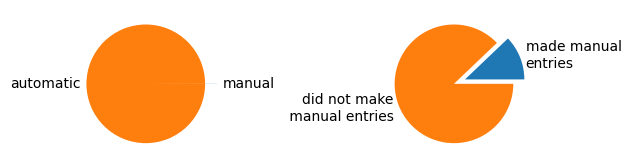

In [49]:
# Create a series of pie charts that show the proportions of users that made manual entries.
pct_record_type = {"manual": pct_manual_records, "automatic": (1-pct_manual_records)*100}
pct_user_type = {"made manual \nentries": pct_users_manual_entries*100, "did not make\n manual entries": (1-pct_users_manual_entries)*100}

fig, axs = plt.subplots(1, 2)

axs[0].pie(pct_record_type.values(), labels=pct_record_type.keys(), explode=[0.2, 0])

axs[1].pie(pct_user_type.values(), labels=pct_user_type.keys(), explode=[0.2, 0])

fig.tight_layout()

plt.show()

In [21]:
# Create a pivot table that summarizes the averages for each user.
pivot_daily_one = pd.pivot_table(df_daily, values=["TotalSteps", "TotalDistance", "Calories", "SedentaryProportion"], index="Id", aggfunc="mean").reset_index()

pivot_daily_one.describe()

,Calories,SedentaryProportion,TotalDistance,TotalSteps
count,33.000000,33.000000,33.000000,33.000000
mean,2282.443660,0.802642,5.398953,7519.272678
std,562.761632,0.081374,2.772293,3576.340125
min,1483.354839,0.683519,0.634516,916.129032
25%,1916.967742,0.736462,3.454839,5566.870968
50%,2131.769231,0.779895,5.295333,7282.966667
75%,2599.620690,0.881495,6.913548,9519.666667
max,3436.580645,0.968863,13.212903,16040.032258


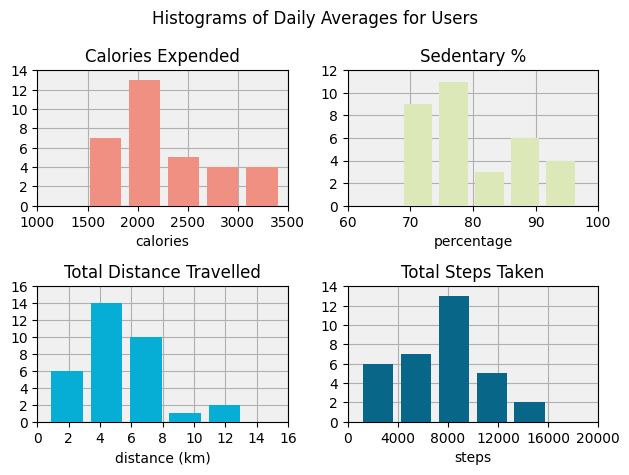

In [22]:
# Create a series of subplots visualizing the users' daily averages.
fig, axs = plt.subplots(2, 2)

# Define the colors for the graphs based on the Bellabeat brand palette.
bellabeat_palette = ["#EF9083", "#DDE8B9", "#06AED5", "#086788", "#5E239D"]

fig.suptitle("Histograms of Daily Averages for Users")

axs[0, 0].set_title("Calories Expended")
axs[0, 0].set_xlabel("calories")
axs[0, 0].grid(True, zorder=0)
axs[0, 0].hist(pivot_daily_one["Calories"], bins=5, zorder=10, rwidth=0.8, color=bellabeat_palette[0])
axs[0, 0].set_xticks(range(1000, 4000, 500))
axs[0, 0].set_yticks(range(0, 15, 2))
axs[0, 0].set_facecolor("#F0F0F0")

axs[0, 1].set_title("Sedentary %")
axs[0, 1].set_xlabel("percentage")
axs[0, 1].grid(True, zorder=0)
axs[0, 1].hist(pivot_daily_one["SedentaryProportion"] * 100, bins=5, zorder=10, rwidth=0.8, color=bellabeat_palette[1])
axs[0, 1].set_xticks(range(60, 110, 10))
axs[0, 1].set_yticks(range(0, 13, 2))
axs[0, 1].set_facecolor("#F0F0F0")

axs[1, 0].set_title("Total Distance Travelled")
axs[1, 0].set_xlabel("distance (km)")
axs[1, 0].grid(True, zorder=0)
axs[1, 0].hist(pivot_daily_one["TotalDistance"], bins=5, zorder=10, rwidth=0.8, color=bellabeat_palette[2])
axs[1, 0].set_xticks(range(0, 17, 2))
axs[1, 0].set_yticks(range(0, 17, 2))
axs[1, 0].set_facecolor("#F0F0F0")

axs[1, 1].set_title("Total Steps Taken")
axs[1, 1].set_xlabel("steps")
axs[1, 1].grid(True, zorder=0)
axs[1, 1].hist(pivot_daily_one["TotalSteps"], bins=5, zorder=10, rwidth=0.8, color=bellabeat_palette[3])
axs[1, 1].set_xticks(range(0, 21000, 4000))
axs[1, 1].set_yticks(range(0, 15, 2))
axs[1, 1].set_facecolor("#F0F0F0")

fig.tight_layout()

plt.show()

In [23]:
# Create a pivot table that summarizes the averages for each day across all users.
df_daily["ActivityDateString"] = df_daily["ActivityDate"].apply(lambda x: x.strftime(format="%m/%d"))

pivot_daily_two = pd.pivot_table(df_daily, values=["TotalSteps", "TotalDistance", "Calories", "SedentaryProportion"], index="ActivityDateString", aggfunc="mean").reset_index()

pivot_daily_two.describe()

,Calories,SedentaryProportion,TotalDistance,TotalSteps
count,31.000000,31.000000,31.000000,31.000000
mean,2289.929356,0.799555,5.456798,7591.695802
std,222.951293,0.015419,0.707069,958.559636
min,1139.285714,0.760996,2.443333,3482.333333
25%,2279.293103,0.793402,5.160625,7260.129261
50%,2331.375000,0.802595,5.534688,7743.575758
75%,2374.502225,0.809719,5.932813,8199.908617
max,2453.896552,0.827569,6.291563,8731.034483


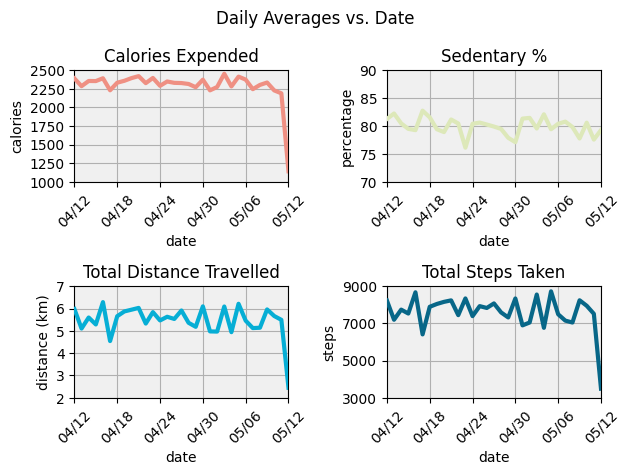

In [24]:
# Create a series of subplots visualizing the change in daily averages throughout the month.
fig, axs = plt.subplots(2, 2)

fig.suptitle("Daily Averages vs. Date")

axs[0, 0].plot(pivot_daily_two["ActivityDateString"], pivot_daily_two["Calories"], zorder=10, color=bellabeat_palette[0], linewidth=3.0)
axs[0, 0].set_title("Calories Expended")
axs[0, 0].set_ylabel("calories")
axs[0, 0].set_xlabel("date")
axs[0, 0].grid(True, zorder=0)
axs[0, 0].set_xticks(np.arange(0, len(pivot_daily_two["ActivityDateString"]), 6))
axs[0, 0].set_xticklabels(pivot_daily_two["ActivityDateString"][np.arange(0, len(pivot_daily_two["ActivityDateString"]), 6)], rotation=45)
axs[0, 0].set_xlim(0, len(pivot_daily_two["ActivityDateString"])-1)
axs[0, 0].set_yticks(range(1000, 2600, 250))
axs[0, 0].set_ylim(1000, 2500)
axs[0, 0].set_facecolor("#F0F0F0")

axs[0, 1].plot(pivot_daily_two["ActivityDateString"], pivot_daily_two["SedentaryProportion"] * 100, zorder=10, color=bellabeat_palette[1], linewidth=3.0)
axs[0, 1].set_title("Sedentary %")
axs[0, 1].set_ylabel("percentage")
axs[0, 1].set_xlabel("date")
axs[0, 1].grid(True, zorder=0)
axs[0, 1].set_xticks(np.arange(0, len(pivot_daily_two["ActivityDateString"]), 6))
axs[0, 1].set_xticklabels(pivot_daily_two["ActivityDateString"][np.arange(0, len(pivot_daily_two["ActivityDateString"]), 6)], rotation=45)
axs[0, 1].set_xlim(0, len(pivot_daily_two["ActivityDateString"])-1)
axs[0, 1].set_yticks(range(70, 95, 5))
axs[0, 1].set_facecolor("#F0F0F0")

axs[1, 0].plot(pivot_daily_two["ActivityDateString"], pivot_daily_two["TotalDistance"], zorder=10, color=bellabeat_palette[2], linewidth=3.0)
axs[1, 0].set_title("Total Distance Travelled")
axs[1, 0].set_ylabel("distance (km)")
axs[1, 0].set_xlabel("date")
axs[1, 0].grid(True, zorder=0)
axs[1, 0].set_xticks(np.arange(0, len(pivot_daily_two["ActivityDateString"]), 6))
axs[1, 0].set_xticklabels(pivot_daily_two["ActivityDateString"][np.arange(0, len(pivot_daily_two["ActivityDateString"]), 6)], rotation=45)
axs[1, 0].set_xlim(0, len(pivot_daily_two["ActivityDateString"])-1)
axs[1, 0].set_yticks(range(2, 8, 1))
axs[1, 0].set_facecolor("#F0F0F0")

axs[1, 1].plot(pivot_daily_two["ActivityDateString"], pivot_daily_two["TotalSteps"], zorder=10, color=bellabeat_palette[3], linewidth=3.0)
axs[1, 1].set_title("Total Steps Taken")
axs[1, 1].set_ylabel("steps")
axs[1, 1].set_xlabel("date")
axs[1, 1].grid(True, zorder=0)
axs[1, 1].set_xticks(np.arange(0, len(pivot_daily_two["ActivityDateString"]), 6))
axs[1, 1].set_xticklabels(pivot_daily_two["ActivityDateString"][np.arange(0, len(pivot_daily_two["ActivityDateString"]), 6)], rotation=45)
axs[1, 1].set_xlim(0, len(pivot_daily_two["ActivityDateString"])-1)
axs[1, 1].set_yticks(range(3000, 10000, 2000))
axs[1, 1].set_facecolor("#F0F0F0")

fig.tight_layout()

plt.show()

### Minute-Level Data

#### How did the average MET rating, intensity of physical activity, number of steps taken and number of calories expended change throughout the day?

The graphs show clear and distinct trends in physical activity throughout the day. Users were essentially inactive between midnight and 5 a.m., but then physical activity increased sharply from 5 a.m. to 9 a.m. Between mid-morning and the early afternoon, from 9 a.m. until around 2 p.m., the users tended to become more and more active, but more gradually than in the early morning. There was a sharp dip in activity in the post-lunch period, from 2 p.m. until 3 p.m., but between 3 p.m. and 7 p.m., physical activity then continued to rise somewhat sharply. In the evening, between 7 p.m. and midnight, users wound down until reaching the neglible levels of activity previously described.

In [25]:
# Create a pivot table that summarizes the averages across all users and group by time of day.
df_minute["TimeOfDay"] = df_minute["ActivityMinute"].apply(lambda x: x.hour + x.minute/60.0 + x.second/3600.0)

pivot_minute_one = pd.pivot_table(df_minute, index="TimeOfDay", values=["METs", "Steps", "Calories", "Intensity"], aggfunc="mean").reset_index()

pivot_minute_one.describe()

,TimeOfDay,Calories,Intensity,METs,Steps
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,11.991667,1.625157,0.201403,1.470893,5.358152
std,6.930608,0.318717,0.123481,0.291249,3.555684
min,0.000000,1.115968,0.002144,1.007074,0.011790
25%,5.995833,1.325587,0.080842,1.182162,1.615725
50%,11.991667,1.694727,0.233062,1.542735,6.280348
75%,17.987500,1.875290,0.300971,1.708572,8.326442
max,23.983333,2.221002,0.430464,2.012141,11.963576


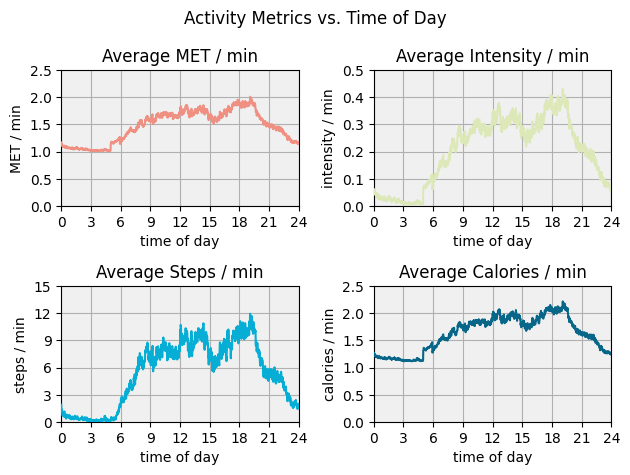

In [26]:
# Create line graphs that show the change in activity metric averages by time of day.
fig, axs = plt.subplots(2, 2)

fig.suptitle("Activity Metrics vs. Time of Day")

axs[0, 0].plot(pivot_minute_one["TimeOfDay"], pivot_minute_one["METs"], zorder=10, color=bellabeat_palette[0])
axs[0, 0].grid(True, zorder=0)
axs[0, 0].set_facecolor("#F0F0F0")
axs[0, 0].set_xticks(range(0, 25, 3))
axs[0, 0].set_xlabel("time of day")
axs[0, 0].set_yticks([n / 2 for n in range(0, 6, 1)])
axs[0, 0].set_ylabel("MET / min")
axs[0, 0].set_xlim(0, 24)
axs[0, 0].set_title("Average MET / min")

axs[0, 1].plot(pivot_minute_one["TimeOfDay"], pivot_minute_one["Intensity"], zorder=10, color=bellabeat_palette[1])
axs[0, 1].grid(True, zorder=0)
axs[0, 1].set_facecolor("#F0F0F0")
axs[0, 1].set_xticks(range(0, 25, 3))
axs[0, 1].set_xlabel("time of day")
axs[0, 1].set_yticks([n / 10 for n in range(0, 6, 1)])
axs[0, 1].set_ylim(0, 0.5)
axs[0, 1].set_ylabel("intensity / min")
axs[0, 1].set_xlim(0, 24)
axs[0, 1].set_title("Average Intensity / min")

axs[1, 0].plot(pivot_minute_one["TimeOfDay"], pivot_minute_one["Steps"], zorder=10, color=bellabeat_palette[2])
axs[1, 0].grid(True, zorder=0)
axs[1, 0].set_facecolor("#F0F0F0")
axs[1, 0].set_xticks(range(0, 25, 3))
axs[1, 0].set_xlabel("time of day")
axs[1, 0].set_yticks(range(0, 16, 3))
axs[1, 0].set_ylim(0, 15)
axs[1, 0].set_ylabel("steps / min")
axs[1, 0].set_xlim(0, 24)
axs[1, 0].set_title("Average Steps / min")

axs[1, 1].plot(pivot_minute_one["TimeOfDay"], pivot_minute_one["Calories"], zorder=10, color=bellabeat_palette[3])
axs[1, 1].grid(True, zorder=0)
axs[1, 1].set_facecolor("#F0F0F0")
axs[1, 1].set_xticks(range(0, 25, 3))
axs[1, 1].set_xlabel("time of day")
axs[1, 1].set_yticks([n / 10 for n in range(0, 26, 5)])
axs[1, 1].set_ylim(0, 2.5)
axs[1, 1].set_ylabel("calories / min")
axs[1, 1].set_xlim(0, 24)
axs[1, 1].set_title("Average Calories / min")

fig.tight_layout()

plt.show()

#### What was the average activity intensity score per minute? What was the average MET rating per minute?

The graph below shows two histograms describing the frequency distributions of average exercise intensity and MET rating. The physical activity scores represent the total score from a user's active time divided by the number of minutes they were active. A higher rating indicates that a user spent more time performing intense activity, while a lower score indicates that the user spent more time sedentary. The MET rating represent a similar relationship to activity intensity.

Examining the minute-by-minute averages for activity intensity, we see that there are three peaks. There are two broad peaks above and below the mean, near 0.18 and 0.24, and a another peak far below the mean near 0.08. Given the range (0.03-0.33) and the standard deviation (0.08), we can see that the average physical activity was quite varied, with many users deviating far from the mean. One outlier had a particularly low average activity intensity score of 0.03. Overall, there were no clear patterns in the physical activity scores of the users during the sample period.

The MET ratings were slightly less varied, tending to be within 0.2 METs of the mean 1.5. However, there were two potential outliers who were quite active in comparison to the rest of the sample, with ratings of around 1.9 METs.

In [27]:
# Create a pivot table that summarizes the averages for each user.
pivot_minute_two = pd.pivot_table(df_minute, index="Id", values=["Intensity", "METs"], aggfunc="mean").reset_index()

pivot_minute_two.describe()

,Intensity,METs
count,33.000000,33.000000
mean,0.197647,1.460551
std,0.079099,0.208885
min,0.030956,1.064828
25%,0.151779,1.316299
50%,0.214064,1.457302
75%,0.251698,1.593890
max,0.331591,1.966798


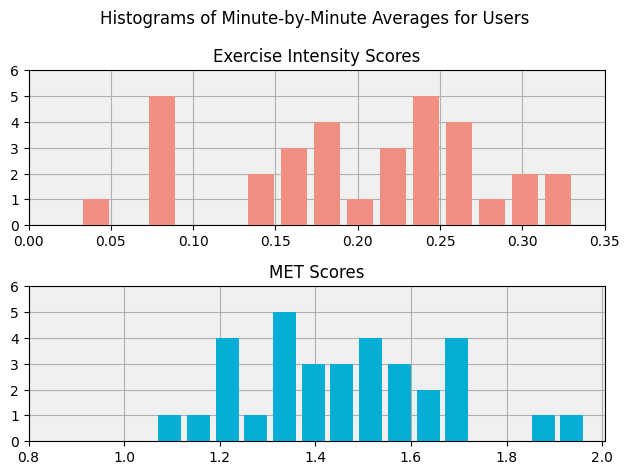

In [28]:
# Create a histogram with the average intensity and METs of each user.
fig, axs = plt.subplots(2, 1)

fig.suptitle("Histograms of Minute-by-Minute Averages for Users")

axs[0].set_title("Exercise Intensity Scores")
axs[0].grid(True, zorder=0)
axs[0].hist(pivot_minute_two["Intensity"], bins=15, rwidth=0.8, zorder=10, color=bellabeat_palette[0])
axs[0].set_yticks(range(0, 10, 1))
axs[0].set_ylim(0, 6)
axs[0].set_xticks([n / 100 for n in range(0, 40, 5)])
axs[0].set_facecolor("#F0F0F0")

axs[1].set_title("MET Scores")
axs[1].grid(True, zorder=0)
axs[1].hist(pivot_minute_two["METs"], bins=15, rwidth=0.8, zorder=10, color=bellabeat_palette[2])
axs[1].set_yticks(range(0, 7, 1))
axs[1].set_xticks([n / 10 for n in range(8, 21, 2)])
axs[1].set_facecolor("#F0F0F0")

fig.tight_layout()

plt.show()

### Sleep Data

#### What was the average duration of each user's sleep? What was the average number of sleep logs recorded? Was there a relationship between the two?

The first table below shows a summary of the aggregate statistics for the average sleep duration and the number of logs for the 24 users that measured their sleep at some point during the sample period. On average, the users slept for 6.4 hours (6 hours 24 minutes) and recorded 19 sleep logs.

The output that follows the first table describes some of the unusual data points from the dataset. All of the users that had an extremely high or low average sleep duration also recorded substantially fewer sleep logs than the average. Besides the outlying averages for sleep duration, there were also five users that had more sleep logs than there were days in the sample period.

The first histogram below ("Histogram of Average Sleep Duration") shows the frequency distribution of users by average sleep duration. From the graph, we can detect the indicative bell shape of a normal distribution near the mean, with most users averaging between 4.5 and 9 hours. There are some outliers above and below the curve, with three users averaging as little as 2 hours of sleep per night, and one user averaging 16 hours.

Next, we have a histogram showing the number of sleep sessions logged per user. Here, the graph has three peaks: a medium-sized group of users on the left that did not record many sleep sessions; a pair of users that logged 15 sleep sessions; and a large group that recorded many sleep sessions.

Finally, we have a scatter plot that shows the relationship between the number of logs and the average duration of the user's sleep session. The line shows a quadratic relationship (i.e. the rate of change itself changes). As the number of measurements increased, the user tended to sleep for longer, until it reached around 20 measurements in the month period. After that, the effect of measuring more sleep cycles began to correlate with a decrease in the amount of time a user slept.

In [29]:
# Summarize the average length of each sleep session for each user.
# Group the data by the log identification numbers and pseudonyms, calculating the start and end time for each sleep session.
grouped_sleep = df_sleep.groupby(["LogId", "Id"])["SleepMinute"].agg(["min", "max"]).reset_index()

# Calculate the duration of each sleep session and assign the value to a new column.
grouped_sleep["Duration"] = grouped_sleep["max"] - grouped_sleep["min"]

# Convert the duration into hours.
grouped_sleep["Duration"] = grouped_sleep["Duration"].apply(lambda x: x.total_seconds() / 3600)

# Create a pivot table from the grouped sleep data, calculating the average sleep time for each user.
pivot_sleep_one = pd.pivot_table(grouped_sleep, values="Duration", index="Id", aggfunc="mean").reset_index()

# Create a pivot table that counts the number of sleep cycle logs per user.
pivot_sleep_two = pd.pivot_table(grouped_sleep, values="LogId", index="Id", aggfunc="count").reset_index()

# Rename the column name to "LogCount" and sort the values.
pivot_sleep_two = pivot_sleep_two.rename(columns={"LogId": "LogCount"}).sort_values(by="LogCount").reset_index(drop=True)

pivot_sleep = pd.merge(pivot_sleep_one, pivot_sleep_two, on="Id", how="inner")

pivot_sleep.describe()

,Duration,LogCount
count,24.000000,24.000000
mean,6.416105,19.125000
std,2.883446,13.211696
min,1.133333,1.000000
25%,5.296111,4.750000
50%,6.745833,23.000000
75%,7.418611,29.250000
max,16.000000,39.000000


In [30]:
# Show the users that had an average sleep duration greater than 10 hours.
df_sleep_outliers_ids = []
df_sleep_outliers_ids.append(pivot_sleep[pivot_sleep["Duration"] > 10]["Id"].iloc[0])
print(f"Users that had an average of more than 10 hours sleep: {df_sleep_outliers_ids[0]}")

# Show the users that had an average sleep duration less than 4 hours.
users_sleep_deprived = pivot_sleep[pivot_sleep["Duration"] < 4]["Id"]
for i in range(len(users_sleep_deprived)):
    df_sleep_outliers_ids.append(users_sleep_deprived.iloc[i])
print(f"Users that had an average of less than 4 hours sleep: {df_sleep_outliers_ids[1:]}")

# Show the users that had more sleep logs than there were days in the sample period (31).
users_excess_sleep = pivot_sleep[pivot_sleep["LogCount"] > 31]["Id"]
for i in range(len(users_excess_sleep)):
    df_sleep_outliers_ids.append(users_excess_sleep.iloc[i])
print(f"Users that had more than 31 sleep logs: {df_sleep_outliers_ids[4:]}")

# Check how many sleep cycles that user logged.
df_sleep_outliers_logs = [pivot_sleep[pivot_sleep["Id"] == id]["LogCount"].iloc[0] for id in df_sleep_outliers_ids]
df_sleep_outliers_dict = dict(zip(df_sleep_outliers_ids, df_sleep_outliers_logs))
print(f'How many sleep cycles each user logged: ')
for id, logs in df_sleep_outliers_dict.items():
    print(f" {id}: {logs}")

# Check how many users

Users that had an average of more than 10 hours sleep: Carolyn
Users that had an average of less than 4 hours sleep: ['George', 'Isaac', 'Susan']
Users that had more than 31 sleep logs: ['Colin', 'Gail', 'Julissa', 'Rodolfo', 'Virginia']
How many sleep cycles each user logged: 
 Carolyn: 3
 George: 2
 Isaac: 1
 Susan: 5
 Colin: 38
 Gail: 34
 Julissa: 39
 Rodolfo: 32
 Virginia: 35


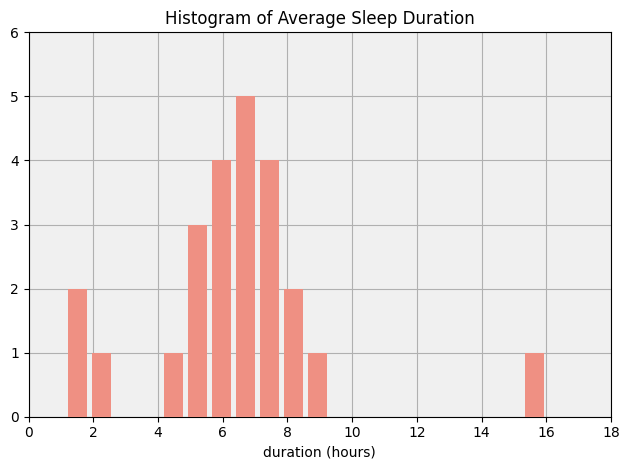

In [31]:
# Plot a histogram that shows the frequency distribution for the average sleep duration.
fig, ax = plt.subplots(1, 1)

ax.set_facecolor("#F0F0F0")
ax.grid(True, zorder=0)
ax.hist(pivot_sleep["Duration"], bins=20, rwidth=0.8, color=bellabeat_palette[0], zorder=10)
ax.set_xlabel("duration (hours)")
ax.set_title("Histogram of Average Sleep Duration")
ax.set_yticks(range(0, 7, 1))
ax.set_xticks(range(0, 19, 2))

fig.tight_layout()

plt.show()

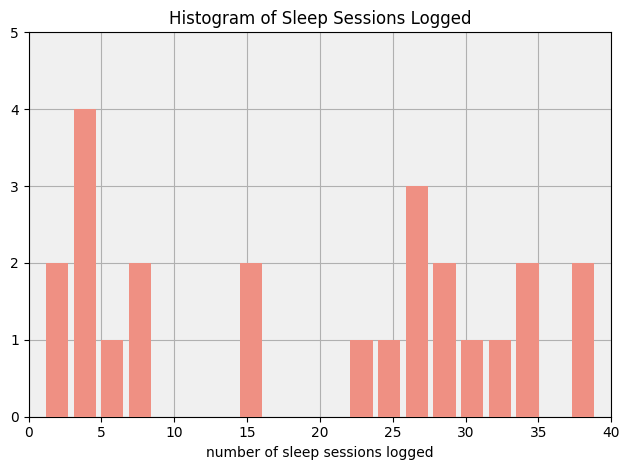

In [32]:
# Plot a histogram that shows the frequency distribution for the number of sleep logs per user.
fig, ax = plt.subplots(1, 1)

ax.set_facecolor("#F0F0F0")
ax.grid(True, zorder=0)
ax.hist(pivot_sleep["LogCount"], bins=20, rwidth=0.8, color=bellabeat_palette[0], zorder=10)
ax.set_xlabel("number of sleep sessions logged")
ax.set_title("Histogram of Sleep Sessions Logged")
ax.set_yticks(range(0, 6, 1))
ax.set_xticks(range(0, 50, 5))
ax.set_xlim(0, 40)

fig.tight_layout()

plt.show()

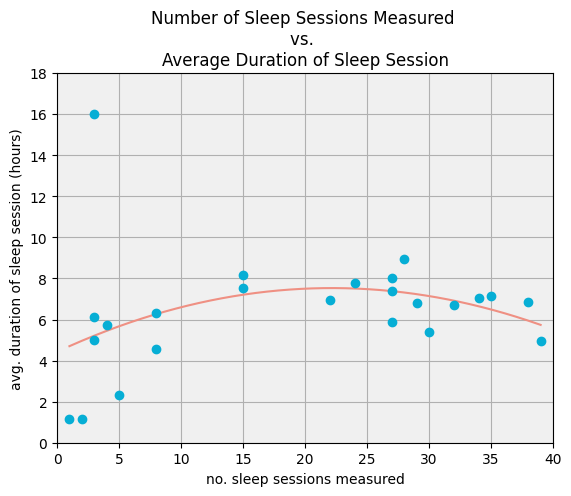

In [33]:
# Create a scatter plot with a line of best fit with the number of sleep sessions logged against average sleep duration.

fig, ax = plt.subplots(1, 1)

coefficients = np.polyfit(pivot_sleep["LogCount"], pivot_sleep["Duration"], 2)
x_values = np.linspace(min(pivot_sleep["LogCount"]), max(pivot_sleep["LogCount"]), num=500)
y_values = np.polyval(coefficients, x_values)

ax.scatter(pivot_sleep["LogCount"], pivot_sleep["Duration"], color=bellabeat_palette[2], zorder=10)
ax.plot(x_values, y_values, color=bellabeat_palette[0])
ax.grid(True, zorder=0)
ax.set_facecolor("#F0F0F0")
ax.set_ylim(0, 18)
ax.set_xlim(0, 40)
ax.set_xlabel("no. sleep sessions measured")
ax.set_ylabel("avg. duration of sleep session (hours)")
ax.set_title("""Number of Sleep Sessions Measured 
vs. 
Average Duration of Sleep Session""")

plt.show()

### Weight Data

#### How many of the users in the sample measured their weight?

Of the 33 users in the sample, 8 took at least one weight measurement during the sample period. From those eight, only five made more than one weight measurement.

#### How did the weight of the users change?

The users that monitored their weight during the sample period and made more than one measurement lost an average of 1.1 lbs. One user gained weight during the period (1.3 lbs), and another lost significantly more than the rest (4.0 lbs).

In [34]:
# Summarize the weight data by user, calculating the first and last weight measurement, the number of measurements, and the start and end date for each user.
# Create a pivot table showing the first and last weight measurement for each user.
pivot_weight_one = pd.pivot_table(df_weight, index="Id", values="WeightPounds", aggfunc=["first", "last"]).reset_index()
pivot_weight_one.columns = ["Id", "FirstWeight", "LastWeight"]

# Create a pivot table showing the number of weight measurements per user.
pivot_weight_two = pd.pivot_table(df_weight, index="Id", values="LogId", aggfunc="count").reset_index()
pivot_weight_two.columns = ["Id", "LogCount"]

# Create a pivot table showing the date of the first and last measurement for each user.
pivot_weight_three = pd.pivot_table(df_weight, index="Id", values="Date", aggfunc=["min", "max"]).reset_index()
pivot_weight_three.columns = ["Id", "StartDate", "EndDate"]

# Merge the pivot tables into one.
pivot_weight = pd.merge(left=pivot_weight_one, right=pivot_weight_two, how="inner", on="Id")
pivot_weight = pd.merge(left=pivot_weight, right=pivot_weight_three, how="inner", on="Id")

# Drop the users that had only one measurement.
pivot_weight = pivot_weight[pivot_weight["LogCount"] > 1]

# Add a column that shows the change in weight for each user.
pivot_weight["WeightChange"] = pivot_weight["LastWeight"] - pivot_weight["FirstWeight"]

# Add a column that shows the number of days elapsed between the first and last measurements for each user.
pivot_weight["TimespanDays"] = pivot_weight["EndDate"] - pivot_weight["StartDate"]
pivot_weight["TimespanDays"] = pivot_weight["TimespanDays"].apply(lambda x: x.days)

# Drop the user that had only had two measurements, both on the same day, with no change in weight.
pivot_weight = pivot_weight[(pivot_weight["LogCount"] >= 2) & (pivot_weight["TimespanDays"] > 1)]

# Sort the users by the change in their weight.
pivot_weight = pivot_weight.sort_values(by="WeightChange").reset_index(drop=True)

pivot_weight.describe()

,FirstWeight,LastWeight,LogCount,StartDate,EndDate,WeightChange,TimespanDays
count,5.000000,5.000000,5.000000,5,5,5.000000,5.000000
mean,153.044903,151.942592,12.600000,2016-04-16 20:33:25.400000,2016-05-10 15:44:33.800000,-1.102311,23.600000
min,125.002104,126.324875,2.000000,2016-04-12 06:47:11,2016-05-04 23:59:59,-3.968327,17.000000
25%,137.788914,136.466144,2.000000,2016-04-12 23:59:59,2016-05-09 23:59:59,-1.322770,21.000000
50%,153.662190,152.339420,5.000000,2016-04-17 23:59:59,2016-05-12 06:42:53,-1.322770,21.000000
75%,159.614681,159.394222,24.000000,2016-04-18 23:59:59,2016-05-12 23:59:59,-0.220459,29.000000
max,189.156628,185.188300,30.000000,2016-04-21 23:59:59,2016-05-12 23:59:59,1.322770,30.000000
std,24.324594,22.675699,13.371612,NaN,NaN,1.934550,5.639149


In [35]:
# Print the number of users with weight measurements.
print(f"Number of users with at least 1 weight measurement: {pivot_weight_one['Id'].nunique()}")
print(f"Number of users with more than 1 weight measurement: {pivot_weight['Id'].nunique()}")

Number of users with at least 1 weight measurement: 8
Number of users with more than 1 weight measurement: 5


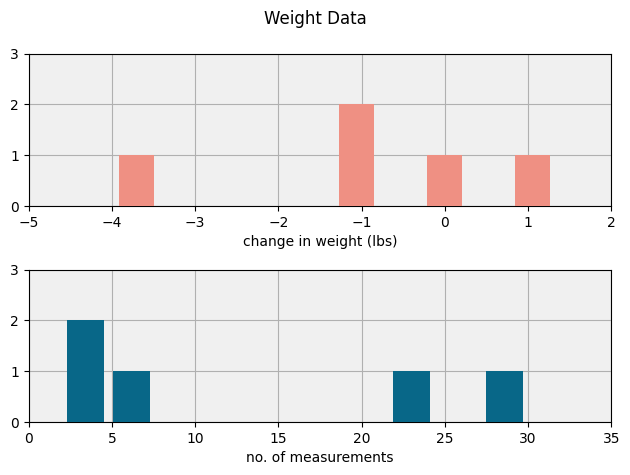

In [36]:
# Create histograms that show the frequency distribution for the change in weight and the number of measurements for each user.
fig, axs = plt.subplots(2, 1)

fig.suptitle("Weight Data")

axs[0].hist(pivot_weight["WeightChange"], bins=10, rwidth=0.8, zorder=10, color=bellabeat_palette[0])
axs[0].set_facecolor("#F0F0F0")
axs[0].grid(True, zorder=0)
axs[0].set_xlabel("change in weight (lbs)")
axs[0].set_yticks(range(0, 5, 1))
axs[0].set_ylim(0, 3)
axs[0].set_xticks(range(-5, 3, 1))

axs[1].hist(pivot_weight["LogCount"], bins=10, rwidth=0.8, zorder=10, color=bellabeat_palette[3])
axs[1].set_facecolor("#F0F0F0")
axs[1].grid(True, zorder=0)
axs[1].set_xlabel("no. of measurements")
axs[1].set_yticks(range(0, 5, 1))
axs[1].set_ylim(0, 3)
axs[1].set_xticks(range(0, 40, 5))

fig.tight_layout()

plt.show()

#### Was there a correlation between the number of weight measurements and the change in weight for each user?

The graph shows that there was a weak negative correlation between the number of weight measurements taken and a decrease in weight. As measurement count increased, weight change tended to decrease.

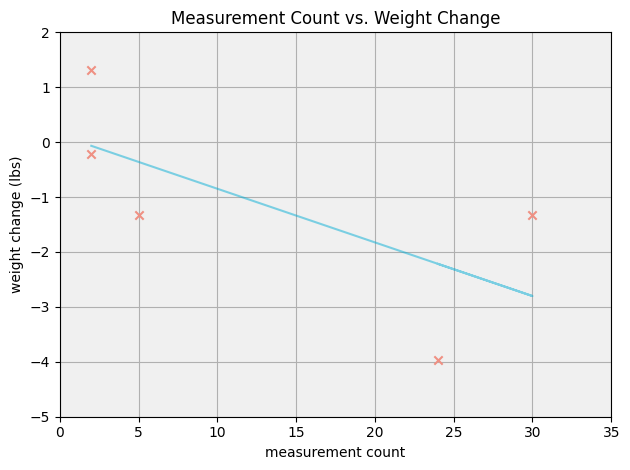

In [37]:
# Create a scatter plot showing the relationship between the number of weight measurements and the change in weight for each user.
fig, ax = plt.subplots(1, 1)

m, b = np.polyfit(pivot_weight["LogCount"], pivot_weight["WeightChange"], 1)

ax.scatter(pivot_weight["LogCount"], pivot_weight["WeightChange"], color=bellabeat_palette[0], zorder=10, marker="x")
ax.plot(pivot_weight["LogCount"], m*pivot_weight["LogCount"] + b, color=bellabeat_palette[2], alpha=0.5)
ax.grid(True, zorder=0)
ax.set_facecolor("#F0F0F0")
ax.set_yticks(range(-5, 3, 1))
ax.set_xticks(range(0, 40, 5))
ax.set_title("Measurement Count vs. Weight Change")
ax.set_ylabel("weight change (lbs)")
ax.set_xlabel("measurement count")

fig.tight_layout()

plt.show()

### Heart Rate Data

#### What was the average heart rate across users?

Of the 33 users in the sample, 14 monitored their heart rate. The average across those 14 users was 80 beats per minute.

#### How did the average heart rate change throughout the day?

The heart rate data shows a similar trend to the activity metrics versus time of day graphs above. We can see that there is a gradual decline in heart rate from midnight until 5 a.m. After which, there is a steep climb until around 7 a.m., which becomes more gradual until 10 a.m. After 10 a.m., heart rate declined slightly until just before midday, at which point it spiked, only to continue rising until 2 p.m. At 3 p.m., there is a small trough, followed by a gradual increase until just before 7 p.m. Finally, heart rate declines rapidly through midnight until 5 a.m.

In [38]:
# Create a pivot table showing the average heart rate for each user.
pivot_heart_one = pd.pivot_table(df_heart, values="BPM", index="Id", aggfunc="mean").reset_index()

pivot_heart_one.describe()

,BPM
count,14.000000
mean,79.983365
std,8.754095
min,66.132998
25%,73.546311
50%,80.955403
75%,83.715215
max,93.776305


In [39]:
# Summarize the heart rate data by time of day.
# Create a "TimeOfDay" column.
df_heart["TimeOfDay"] = df_heart["Time"].apply(lambda x: x.hour + x.minute/60.0)

# Create a pivot table with the time of day as the index and the average heart rate as the values.
pivot_heart_two = pd.pivot_table(df_heart, values="BPM", index="TimeOfDay", aggfunc="mean").reset_index()

pivot_heart_two.describe()

,TimeOfDay,BPM
count,1440.000000,1440.000000
mean,11.991667,75.163235
std,6.930608,8.071416
min,0.000000,59.199807
25%,5.995833,67.471996
50%,11.991667,77.772215
75%,17.987500,81.275022
max,23.983333,89.214101


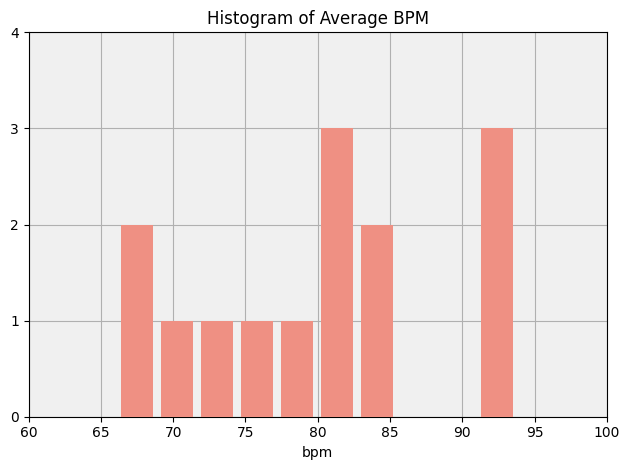

In [40]:
# Create a histogram showing the frequency distribution of the average heart rate for each user.
fig, ax = plt.subplots(1, 1)

ax.hist(pivot_heart_one["BPM"], bins=10, rwidth=0.8, zorder=10, color=bellabeat_palette[0])
ax.grid(True, zorder=0)
ax.set_facecolor("#F0F0F0")
ax.set_xlabel("bpm")
ax.set_title("Histogram of Average BPM")
ax.set_yticks(range(0, 5, 1))
ax.set_xticks(range(60, 105, 5))

fig.tight_layout()

plt.show()

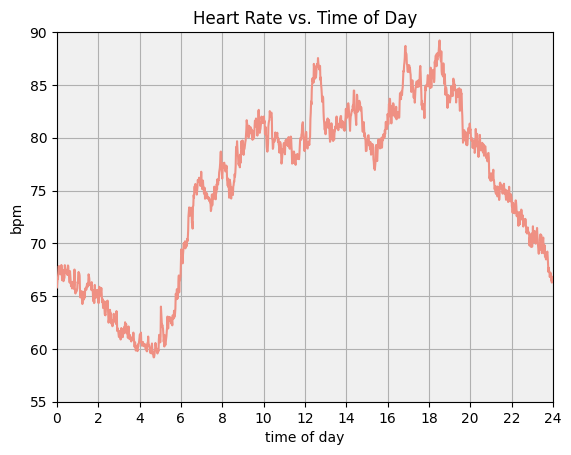

In [41]:
# Create a line graph showing the change in heart rate throughout the day.
fig, ax = plt.subplots(1, 1)

ax.plot(pivot_heart_two["TimeOfDay"], pivot_heart_two["BPM"], color=bellabeat_palette[0], zorder=10)
ax.grid(True, zorder=0)
ax.set_facecolor("#F0F0F0")
ax.set_xticks(range(0, 25, 2))
ax.set_xlim(0, 24)
ax.set_xlabel("time of day")
ax.set_ylim(55, 90)
ax.set_ylabel("bpm")
ax.set_title("Heart Rate vs. Time of Day")

plt.show()

## Insights & Recommendations



Presumably, when a person makes a decision to buy a Fitbit, it is because they want a watch that does more than tell the time. However, the ability of smart devices to provide actionable insights to users depends on the quality of the data they collect. If the user does not wear the device, the device cannot collect data. That is, of course, unless the user adds the data herself.

Only 3.4 % of all records contain manually-added data and only 12.1 % of users made a single manual entry. Users may not manually add data for several reasons: they wear their Fitbits constantly (so they don't need to add data manually), they forget to record exercise done without their devices, they deem certain distances insignificant, or they find data entry too burdensome. 

Given Fitbit's limited battery life and users' habits, the first reason is less likely. More plausible are the other three scenarios. If forgetfulness is the primary issue, Bellabeat can send reminders to users to input missing data with app notifications. On the other hand, if users seldom move without the device, any data discrepancies should be minimal. Finally, user-friendly designs could make inputting data manually less of a chore.

Many of the metrics that are collected by Fitbit devices are calculations based on personal data provided by the user. MET ratings, physical activity intensity scores and the number of calories expended are among them. For example, users add their height, weight, age and gender, then the device utilizes those statistics, combined with heart rate information and movement data collected by the device, to calculate an MET rating, which it then assigns to a timestamp. 

The formulae used by Fitbit to calculate these metrics are not publicly available, as it is part of Fitbit's proprietary algorithms, but the efficacy of any smart device to the user will depend on its ability to infer other metrics indirectly. Typically, the data collected and the calculations made by the device are approximations. Collecting accurate data requires more advanced equipment, which is usually inconvenient to wear for any length of time. Most smart devices are a trade-off between convenience and curiosity: We want to know what is going on in our body, but only if it can be done practically.

Using the Fitbit data, we were able to discover more about the routine of the users in our sample. However, we have to reiterate the significance of the small sample size. Any insights about consumer behaviour or activity metrics are unlikely to be representative of the population of wearable owners. Nevertheless, we can at least highlight areas of interest for future studies. 

The users seemed to wake up no earlier than 5 a.m. and would gradually become more active until around 3 p.m., when their activity would decline slightly. This may be because most people do not work out on a full stomach, and so post-lunch workouts were rare. The exercise metrics then continued to rise until around 7 p.m., when they began to decline rapidly. Many users likely finished work around 5 p.m., then went to the gym. After that, people normally have dinner, so workouts in the evening were rare. 

These observations can help Bellabeat time their notifications to coincide with peak exercise times. That way, users may already be thinking about their health, and so they may be more likely to pay attention to the notification.

Very few users tracked their weight during the sample period. This could be because they did not have access to a weighing scale, or they had access, but did not input the data into the app. Smart scales, which interact automatically with a user's smartphone, are becoming increasingly popular. By eliminating the need to enter the data manually, consumers may find themselves more drawn to the idea of owning a smart scale.

Even though the sample size for the dataset was small, the number of users that monitored their weight was even smaller. There was a weak correlation between the number of weight measurements and weight loss. In itself, this does not tell us much, but it may be worthwhile to investigate this correlation with larger samples. A lack of awareness may cause weight gain, as people tend to become overweight gradually over a period of months or years.

Not all users monitored their sleep patterns, but monitoring sleep may not always be helpful. Users that monitored their sleep for more than half the month tended to sleep for longer at night than those that monitored their sleep less. However, users that monitored their sleep too diligently seem to have slept about as much as those that monitored it rarely.

The fluctuations in sleep patterns should be investigated in larger samples, but there could be some interesting insights there. Sleep anxiety is a relatively common problem, caused by a person worrying about not getting enough sleep. If a person is constantly monitoring the way they sleep, they may begin to try and control all the variables involved in detail. Ironically, the consequence could be that the person ends up sleeping less.

Finally, there was no demographic information available on the users in the dataset. Therefore, we cannot conclude what proportion of the users were women, and whether their usage differed from that of men. Future studies will need to focus on exercise data from women in order to provide the most relevant insights to Bellabeat.

## Conclusion

In conclusion, the analysis of Fitbit user data has provided valuable insights into user behavior and preferences, offering actionable recommendations for the marketing strategies of Bellabeat. While the small sample size limits the generalizability of the findings, they serve as a starting point for further exploration. The key takeaways include the importance of user-friendly designs, convenient data entry options, optimized notification timings, promoting the benefits of weight monitoring and smart scales, and addressing sleep-related concerns.

However, it is important to acknowledge the limitation of missing demographic information in the dataset. Without information on the proportion of female users and potential differences in their usage patterns, further research focusing on exercise data from women is needed to provide more relevant and inclusive insights to Bellabeat.